In [230]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
housing = pd.read_csv( "housing.csv", thousands=',')
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']
data = pd.read_csv("auto-mpg.data", names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [231]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [232]:
data.dropna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [233]:
data['MPG']


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64

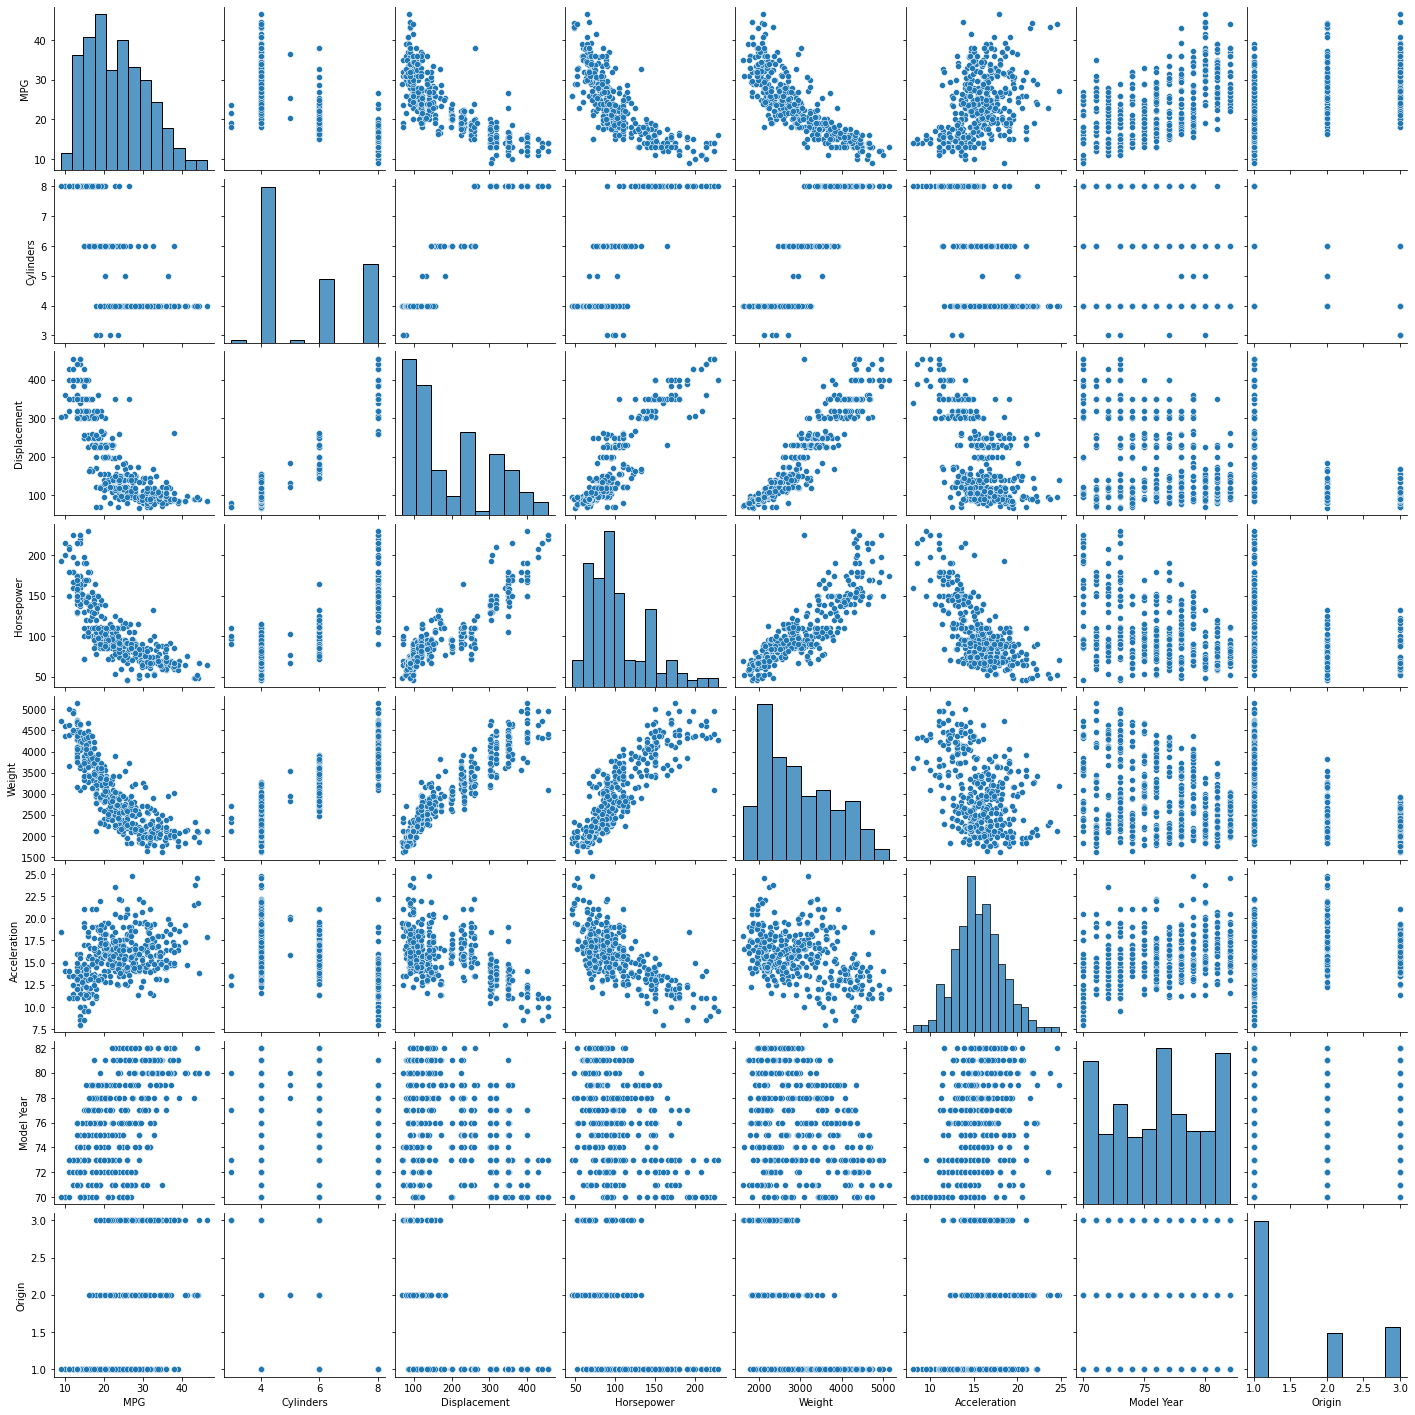

In [234]:
sns.pairplot(data)

In [235]:
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

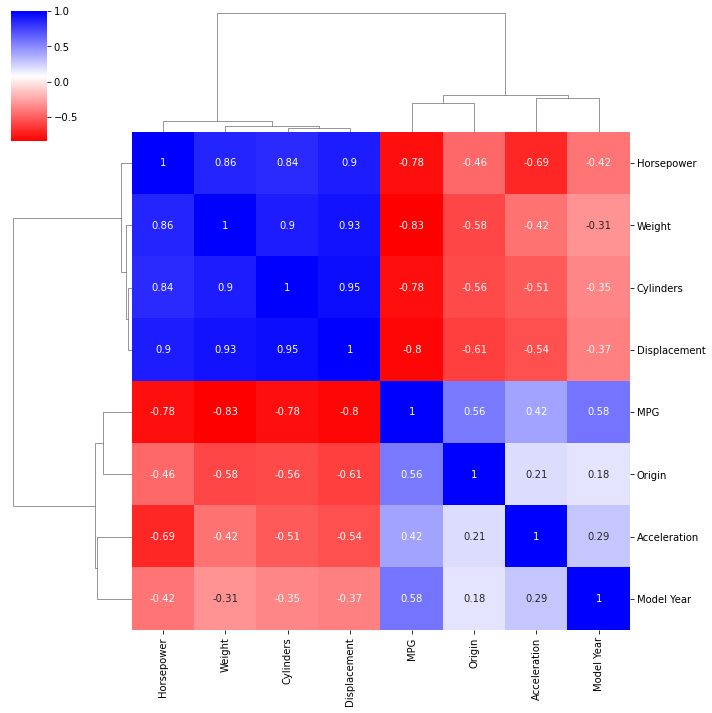

In [236]:
sns.clustermap(data.corr(), annot=True, cmap='bwr_r')

In [237]:
data=data.dropna().reset_index(drop = True)
data["Origin"] = pd.cut(data["Origin"],
                               bins=[0, 1, 2, np.inf],
                               labels=["USA", "EUROPE", "JAPAN"])

data["Origin"].head()
data["Origin"].dropna(inplace=True)

a variable « MPG » désigne la consommation en miles par galon et c’est notre variable cible. 
La variable « Origine » est catégoriel et non numérique. Elle vaut 1 pour les 'USA', 2 pour 'Europe' et 
3 pour 'Japan'. Alors convertissez là !

In [238]:
data["Origin"].isna().sum()

0

In [239]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,USA
388,44.0,4,97.0,52.0,2130.0,24.6,82,EUROPE
389,32.0,4,135.0,84.0,2295.0,11.6,82,USA
390,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [240]:
data['Origin']

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
387       USA
388    EUROPE
389       USA
390       USA
391       USA
Name: Origin, Length: 392, dtype: category
Categories (3, object): ['USA' < 'EUROPE' < 'JAPAN']

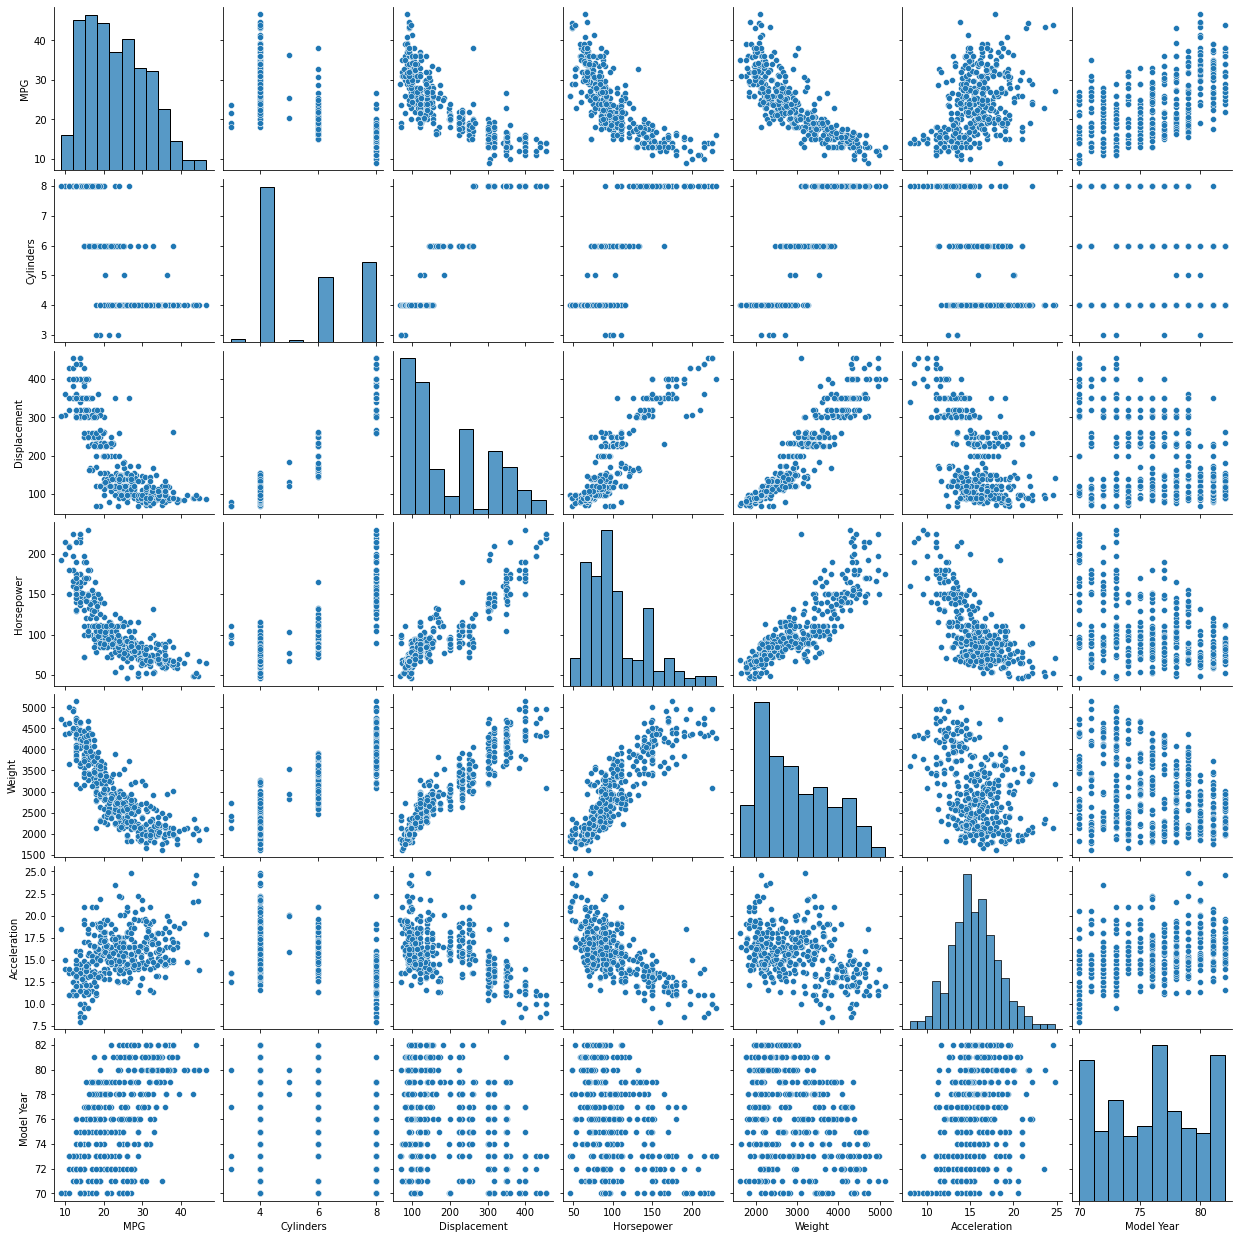

In [241]:
sns.pairplot(data)


In [259]:
data["Horsepower"]

0

In [242]:
data.dropna()
data=data.dropna().reset_index(drop = True)

In [243]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2,
                               test_size=0.2, random_state=40)

for train_index, test_index in split.split(data, data["Origin"]):
    # housing["median_house_value_disc"]
    print(train_index)
    print(test_index )

[179 219 187 362 171  35  17 183   8   9 192 243  15  90 384 193 304 253
  66 320 319 182 148 344  56 246 251 101 104  72 208 216 391  31 126 288
   0 328 116 102  81  98 310 189 298 202 227 190  26 270  11  21 154  39
 258 284 336  50 120  46 335 312 314 138 128 330 196 231 323 127 210  67
 365 275  74 199 269  60 349 363 172 110 195 205 145  59 291 356 149 341
 289  28 164 326 367 129 301 175  42 382 137 313 283 223 271  44 140 212
 317 267 160 316 294 220  91  73 242 121  25  40 106  58 277 236  43 237
 274 357 302 211 136 146   4 142 156  27 311 296 286 194 350 299  19 295
 155 383 371 169   7 266  65 141 278  38 181  49 167 306  52 285 287  23
  61  87 159  13 346 184 265  68 340 166 114 232  32  93 309 245 372 250
 130 186 249  71  10  54  34 176  78 355 235 224 308 107 332 300 327 153
 375  36 387 133  62   6 178  24  70 303 368 347 118 115   5 390 262 381
 238 364 281  95  45 366 247 353 290  88 225 150 377 185 385 123  97   3
 173 113 324 214 343 151 342 152 158  85  12  92  5

In [244]:
for train_index, test_index in split.split(data, data["Origin"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [245]:
strat_test_set["Origin"].value_counts(normalize=True)

USA       0.620253
JAPAN     0.202532
EUROPE    0.177215
Name: Origin, dtype: float64

In [246]:
data["Origin"].value_counts(normalize=True)

USA       0.625000
JAPAN     0.201531
EUROPE    0.173469
Name: Origin, dtype: float64

In [247]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [248]:

cat_encoder = OneHotEncoder()
housing_long_1hot = cat_encoder.fit_transform(data[["Origin"]])
type(housing_long_1hot)

scipy.sparse.csr.csr_matrix

In [249]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_attribs = ["Horsepower", "Weight"]
cat_attribs = ["Origin"]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [250]:
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

In [270]:
X_train = full_pipeline.fit_transform(strat_train_set)
y_train = np.array(strat_train_set["MPG"])

X_test = full_pipeline.fit_transform(strat_test_set)
y_test = np.array(strat_test_set["MPG"])

"""
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.5))
"""

model = SGDRegressor(max_iter=8500, alpha=0.1)

model.fit(X_train, y_train)

SGDRegressor(alpha=0.1, max_iter=8500)

In [271]:
metric = {'modele': 'model ',
          'mean_absolute_error': mean_absolute_error(y_test, model.predict(X_test), multioutput='raw_values'),
          'mean_squared_error': mean_squared_error(y_test, model.predict(X_test),squared=False),
          'r2_score':r2_score(y_test, model.predict(X_test))
         }

metric["r2_score"]


0.7707552661450967

In [253]:
data.dtypes

MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Model Year         int64
Origin          category
dtype: object

In [283]:
from sklearn.metrics import mean_squared_error
from math import sqrt
data
#ap =  np.mean(np.abs((y_test - X_test)) * 100)

#ab =  2.0 * np.mean(np.abs(y_test - y_train) / (np.abs(y_test) + np.abs(y_train))) * 100


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,USA
388,44.0,4,97.0,52.0,2130.0,24.6,82,EUROPE
389,32.0,4,135.0,84.0,2295.0,11.6,82,USA
390,28.0,4,120.0,79.0,2625.0,18.6,82,USA
